In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
tem = np.arange(start=35,stop=42,step=0.1)
col = [(i-35)/1.5 for i in tem]
noise = np.random.normal(0,0.1,len(col))
new_tem = []
for ii in range(len(col)):
    new_tem.append(tem[ii]+noise[ii])

In [3]:
# arrange data for training
x_train = np.array(col, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
print("x train array shape:",np.shape(x_train))
y_train = np.array(new_tem, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
print("y train array shape:",np.shape(y_train))

x train array shape: (70, 1)
y train array shape: (70, 1)


In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.1 
epochs = 150
weight_list,bias_list = [],[]
epoch_no = []
loss_list = []
model = linearRegression(inputDim, outputDim)
def get_parameters(model):
    "the function is to extract model parameters w and b"
    [w,b] = model.parameters()
    return(w[0][0].item(), b[0].item())

w_be,b_be = get_parameters(model)
w_be,b_be

(-0.3666898012161255, -0.45702064037323)

In [6]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [7]:
for epoch in range(epochs):
    # inputs/labels to variables fitted for Pytorch
    inputs = Variable(torch.from_numpy(x_train))        
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers from previous epochs
    optimizer.zero_grad()

    # model output with given inputs
    outputs = model(inputs)
    
    # predicted output loss
    loss = criterion(outputs, labels)
    
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    # get parameters of w & b
    tem_w,tem_b = get_parameters(model)
    weight_list.append(tem_w)
    bias_list.append(tem_b)
    epoch_no.append(epoch+1)
    # get loss list
    loss_list.append(loss.item())

/Users/tanghongming/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


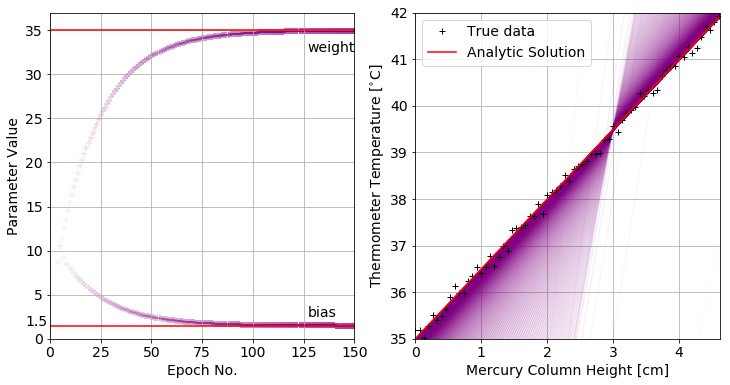

In [8]:
linear_regression = [(i * 1.5 + 35.0) for i in x_train]
# Simulated data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
# Fig.1
for ii in range(len(weight_list)):
    ax1.scatter(epoch_no[ii],weight_list[ii],color='purple',marker='+',alpha=(ii+1)/len(epoch_no))
    ax1.scatter(epoch_no[ii],bias_list[ii],color='purple',marker='+',alpha=(ii+1)/len(epoch_no))
    
ax1.axhline(y=1.5,color='red')
# Linear Regression
ax1.set_xlabel("Epoch No.",fontsize=14)
ax1.set_ylabel("Parameter Value",fontsize=14)
# Tick size
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.axhline(y=35.0,color='red')
ax1.grid('on')
ax1.set_xlim(0,150)
ax1.set_ylim(0,37)
# print text
# weight
ax1.text(127,32.5,"weight",fontsize=14)
# bias
ax1.text(127,2.5,"bias",fontsize=14)
# y = 1.5
ax1.text(-12,1.5,"1.5",fontsize=14)

for jj in range(len(weight_list)):
    prediction = [i * weight_list[jj] + bias_list[jj] for i in x_train]
    ax2.plot(x_train, prediction, '-', color='purple',alpha=(jj+1)/len(weight_list))
ax2.plot(x_train, y_train, '+', label='True data', color='black')
ax2.plot(x_train, linear_regression, '-', color='red',alpha=1,label='Analytic Solution')
ax2.legend(loc='best',fontsize=14)
ax2.set_ylim([35,42])
ax2.set_xlim([0,4.61])
# Tick size
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.grid('on')
ax2.set_xlabel("Mercury Column Height [cm]",fontsize=14)
ax2.set_ylabel("Thermometer Temperature [$^{\circ}$C]",fontsize=14)

plt.savefig("ML_simple_linear_regression_track.pdf")

/Users/tanghongming/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0.010903243906795979


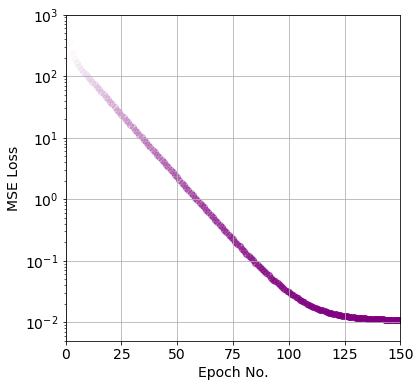

In [9]:
loss_trace_list = []
for ii in range(len(weight_list)):
    tem_loss = 0
    for jj in range(len(x_train)):
        y_predict_tem = x_train[jj] * weight_list[ii] + bias_list[ii]
        tem_dis = y_predict_tem - y_train[jj]
        tem_dis_sqr = tem_dis**2
        tem_loss += tem_dis_sqr
    tem_loss /= len(x_train)
    loss_trace_list.append(tem_loss.item())

x_plot = [i+1 for i in range(len(weight_list))]


plt.figure(figsize=(6,6))
for ii in range(len(x_plot)):
    plt.scatter(x_plot[ii],loss_trace_list[ii],color='purple',alpha=(ii+1)/len(x_plot))
plt.yscale('log')
plt.ylim([0.005,1000])
plt.xlim([0,150])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Epoch No.",fontsize=14)
plt.ylabel("MSE Loss",fontsize=14)
plt.grid('on')
plt.savefig('ML_simple_lin_reg_MSE_loss_curve.pdf')

print(min(loss_trace_list))

In [10]:
weight_gradient_simulated = []
bias_gradient_simulated = []

for ii in range(len(weight_list)):
    tem_gradient_weight,tem_gradient_bias = 0,0
    for jj in range(len(x_train)):
        tem_gradient_weight += (y_train[jj]-weight_list[ii]*x_train[jj] - bias_list[ii])*x_train[jj]
        tem_gradient_bias += (y_train[jj]-weight_list[ii]*x_train[jj] - bias_list[ii])
    tem_gradient_weight *= (-2./70.)
    tem_gradient_bias *= (-2./70.)
    weight_gradient_simulated.append(tem_gradient_weight.item())
    bias_gradient_simulated.append(tem_gradient_bias.item())

So our assumption is fine, the MSE loss IS the mean of the sum of squared loss

In [11]:
gradient_list_weight,gradient_list_bias = [],[]
for ii in range(len(weight_list)-1):
    tem_rate_weight = (weight_list[ii] - weight_list[ii+1])
    tem_rate_bias = (bias_list[ii] - bias_list[ii+1])
    gradient_list_weight.append(tem_rate_weight/learningRate)
    gradient_list_bias.append(tem_rate_bias/learningRate)

In [12]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

Now let's visualize the derivation theory behind the **training** process:

/Users/tanghongming/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


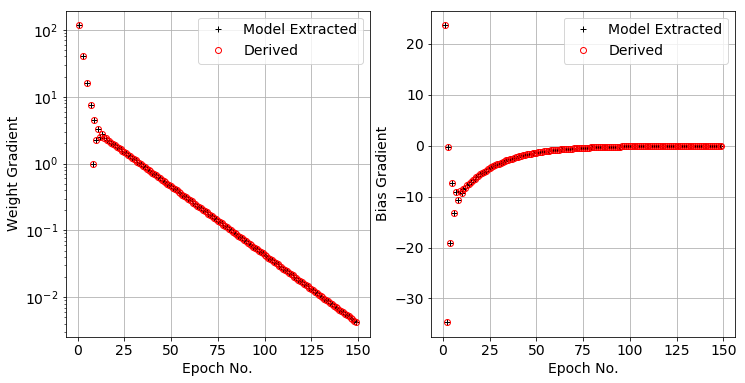

In [14]:
weight_gradient_simulated_to_plot = weight_gradient_simulated[:-1]
bias_gradient_simulated_to_plot = bias_gradient_simulated[:-1]
x_weight = [i+1 for i in range(len(gradient_list_weight))]
x_bias = [i+1 for i in range(len(gradient_list_bias))]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
# Fig.1
ax1.plot(x_weight,gradient_list_weight,'+',color='black',label='Model Extracted')
ax1.plot(x_weight,weight_gradient_simulated_to_plot,'o',mfc='None',mec='red',label='Derived')
ax1.set_yscale('log')
ax1.set_ylabel('Weight Gradient',fontsize=14)
ax1.set_xlabel('Epoch No.',fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(loc='best',fontsize=14)
ax1.grid('on')
# Fig.2
ax2.plot(x_bias,gradient_list_bias,'+',color='black',label='Model Extracted')
ax2.plot(x_bias,bias_gradient_simulated_to_plot,'o',mfc='None',mec='red',label='Derived')
ax2.set_ylabel('Bias Gradient',fontsize=14)
ax2.set_xlabel('Epoch No.',fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.legend(loc='best',fontsize=14)
ax2.grid('on')
plt.savefig('weight_and_bias_gradient_consistency.pdf')